### Plot the motion of the bunch centroid along the emittance

- For different $\mathrm{\alpha_{yy}}$ values.

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

#### Plotting paramerters

In [3]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data folder

b) Load the values of the transverse emittances in lists.

In [4]:
n_turns = int(1e4)            # number of cycles to run the simulation for
decTurns = int(1)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 

#### Convert turns to time [s]

In [5]:
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [6]:
wakes = 'ON'

In [7]:
ayy_scan = [4000.0, 6000.0, 12000.0, -4000.0, -6000.0, -12000.0]

In [8]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
study_name =f'sps_270GeV_noCC_wakes{wakes}_sinOffset_QpxQpy1_ayy'

### Load the data

In [9]:
meanX_list, meanY_list = [], []
emitY_list, emitX_list= [], []
for ayy in ayy_scan:
    meanX, meanY, emitX, emitY = np.loadtxt(path_to_data+f'{study_name}{ayy}_fixedKicksSet0_run0/file.txt', delimiter = ",", unpack = True)
    meanX_list.append(meanX)
    meanY_list.append(meanY)
    emitX_list.append(emitX)
    emitY_list.append(emitY)
    

### Plot meanY

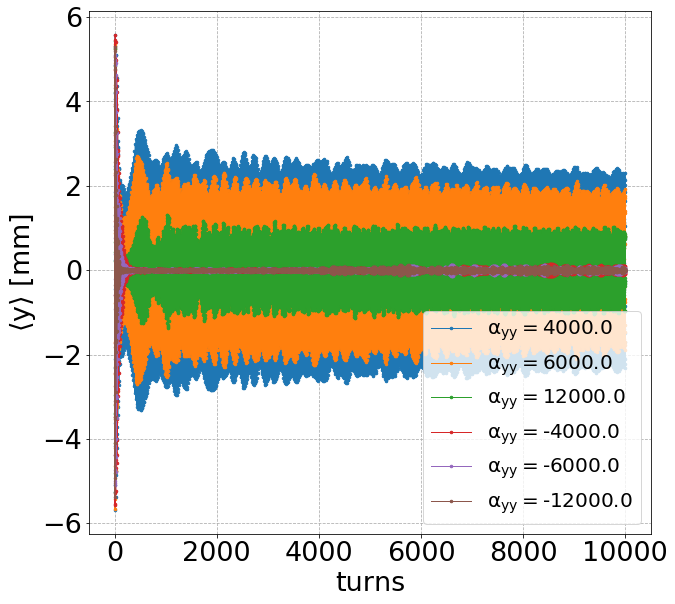

In [10]:
fig, ax = plt.subplots()
for i, ayy in enumerate(ayy_scan):
    ax.plot(meanY_list[i]*1e3, '.-', label=r'$\mathrm{\alpha_{yy}=}$'+f'{ayy}')
ax.set_xlabel('turns')
ax.set_ylabel(r'$\mathrm{\langle y \rangle \ [mm]}$')
ax.grid(linestyle='dashed')
ax.legend(loc=0)

plt.tight_layout()

savefig = True
if savefig:
    plt.savefig(f'./output/meanY_{study_name}Scan.png', bbox_inches='tight')

### Plot emitY

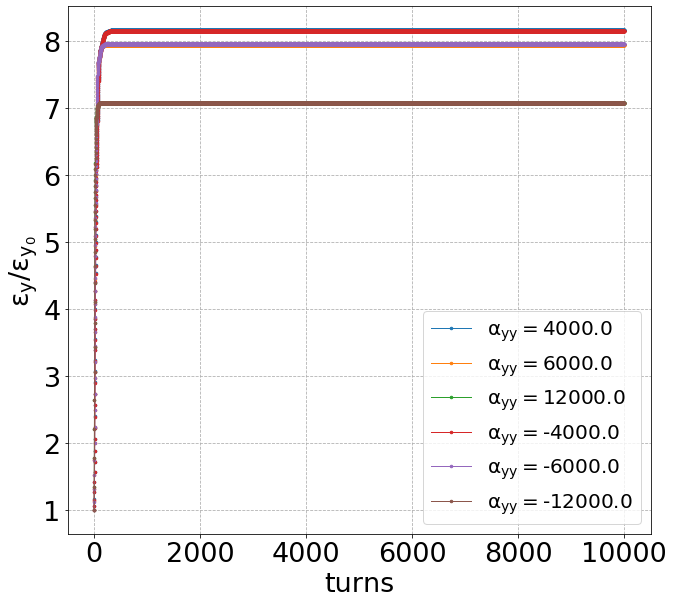

In [39]:
fig, ax = plt.subplots()
for i, ayy in enumerate(ayy_scan):
    ax.plot(emitY_list[i]/emitY_list[i][0], '.-', label=r'$\mathrm{\alpha_{yy}=}$'+f'{ayy}')
ax.set_xlabel('turns')
ax.set_ylabel(r'$\mathrm{\epsilon_y / \epsilon_{y_0}}$')
ax.grid(linestyle='dashed')
ax.legend(loc=0)

plt.tight_layout()

savefig = True
if savefig:
    plt.savefig(f'./output/emitY_{study_name}Scan.png', bbox_inches='tight')

### Plot mean X

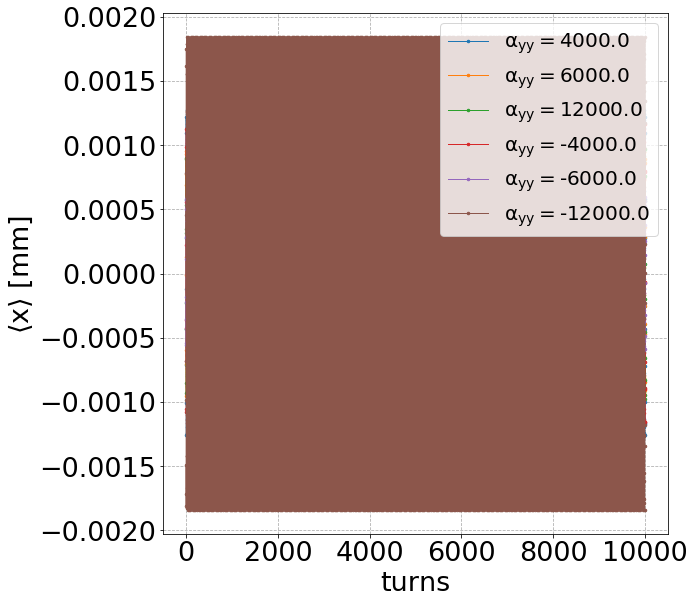

In [40]:
fig, ax = plt.subplots()
for i, ayy in enumerate(ayy_scan):
    ax.plot(meanX_list[i]*1e3, '.-', label=r'$\mathrm{\alpha_{yy}=}$'+f'{ayy}')
ax.set_xlabel('turns')
ax.set_ylabel(r'$\mathrm{\langle x \rangle \ [mm]}$')
ax.grid(linestyle='dashed')
ax.legend(loc=0)

plt.tight_layout()

savefig = True
if savefig:
    plt.savefig(f'./output/meanX_{study_name}Scan.png', bbox_inches='tight')

### Plot emitX

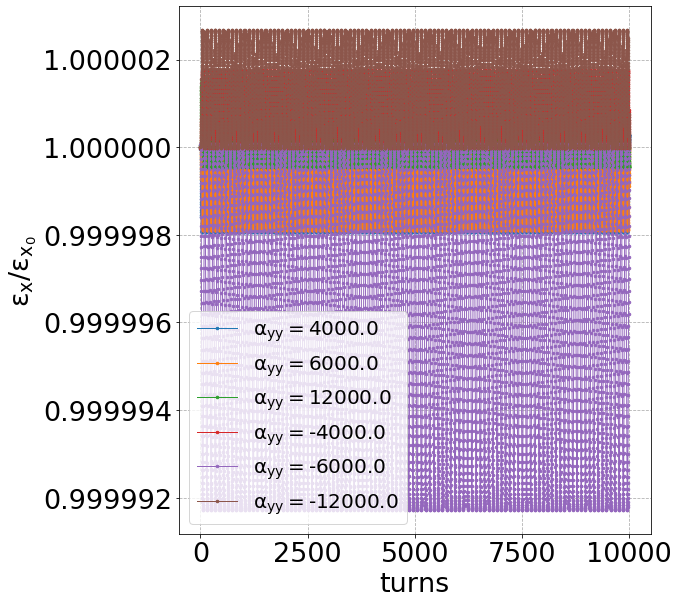

In [41]:
fig, ax = plt.subplots()
for i, ayy in enumerate(ayy_scan):
    ax.plot(emitX_list[i]/emitX_list[i][0], '.-', label=r'$\mathrm{\alpha_{yy}=}$'+f'{ayy}')
ax.set_xlabel('turns')
ax.set_ylabel(r'$\mathrm{\epsilon_x / \epsilon_{x_0}}$')
ax.grid(linestyle='dashed')
ax.legend(loc=0)

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useOffset=False)

plt.tight_layout()

savefig = True
if savefig:
    plt.savefig(f'./output/emitX_{study_name}Scan.png', bbox_inches='tight')